# EDA - General

General Exploratory Data Analysis, to collect Insights for Modelling
Feature Engineering and other Design Decisions

Original code is run on a isolated local instance in R and mantained in a special
structure developed by me.

Code is developed and tested there, then here I just copy the bits for running.

## 1. Reading the Data

Original code here: [001-Data_Import.R](../code/001-Data_Import.R)

In [7]:
source('../trunk/progs/001-Data_Import.R')

Parse with reader=readr : ../trunk/data/freMTPL2freq.arff

header: 0.006000; preproc: 0.269000; data: 0.472000; postproc: 0.045000; total: 0.792000

Parse with reader=readr : ../trunk/data/freMTPL2sev.arff

header: 0.002000; preproc: 0.008000; data: 0.008000; postproc: 0.000000; total: 0.018000



In [42]:
str(m1)

'data.frame':	678013 obs. of  14 variables:
 $ IDpol     : num  1 3 5 10 11 13 15 17 18 21 ...
 $ ClaimNb   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Exposure  : num  0.1 0.77 0.75 0.09 0.84 0.52 0.45 0.27 0.71 0.15 ...
 $ Area      : Factor w/ 6 levels "A","B","C","D",..: 4 4 2 2 2 5 5 3 3 2 ...
 $ VehPower  : num  5 5 6 7 7 6 6 7 7 7 ...
 $ VehAge    : num  0 0 2 0 0 2 2 0 0 0 ...
 $ DrivAge   : num  55 55 52 46 46 38 38 33 33 41 ...
 $ BonusMalus: num  50 50 50 50 50 50 50 68 68 50 ...
 $ VehBrand  : Factor w/ 11 levels "B1","B10","B11",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ VehGas    : chr  "Regular" "Regular" "Diesel" "Diesel" ...
 $ Density   : num  1217 1217 54 76 76 ...
 $ Region    : Factor w/ 22 levels "R11","R21","R22",..: 18 18 3 15 15 8 8 20 20 12 ...
 $ Claim     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ sumClaims : num  NA NA NA NA NA NA NA NA NA NA ...


In [43]:
summary(m1$ClaimNb)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.00000  0.00000  0.05325  0.00000 16.00000 

## 2. Continous Predictors Check

DrivAge, VehAge, Density, BonusMalus, VehPower, 

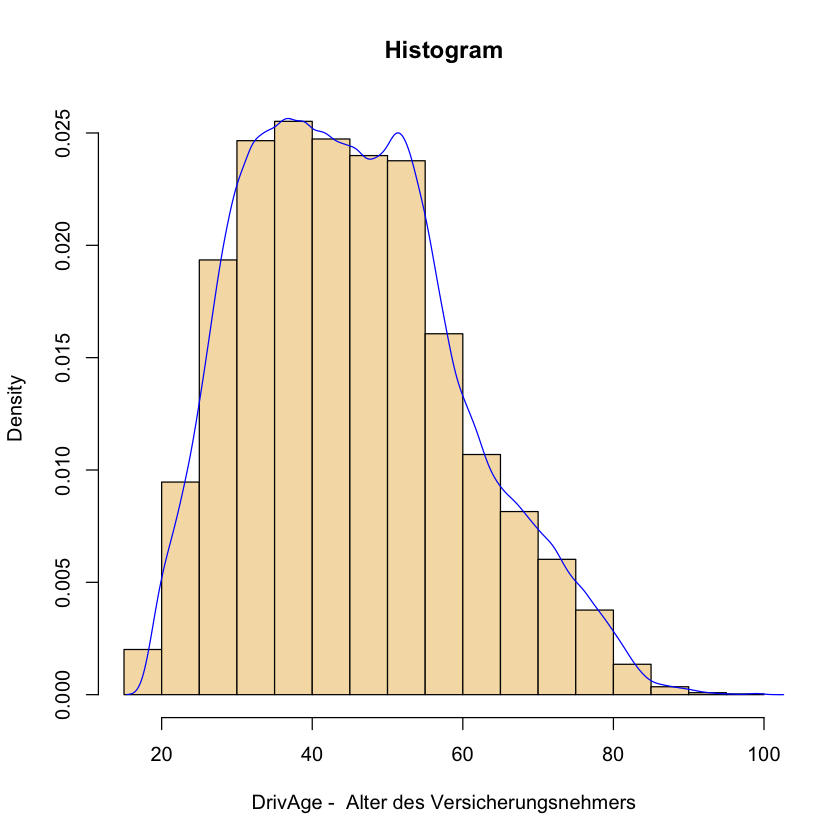

In [44]:
hist(m1$DrivAge, col = 'wheat', prob = TRUE , xlab = 'DrivAge -  Alter des Versicherungsnehmers', main = 'Histogram' )
lines(density(m1$DrivAge), col = 'blue')


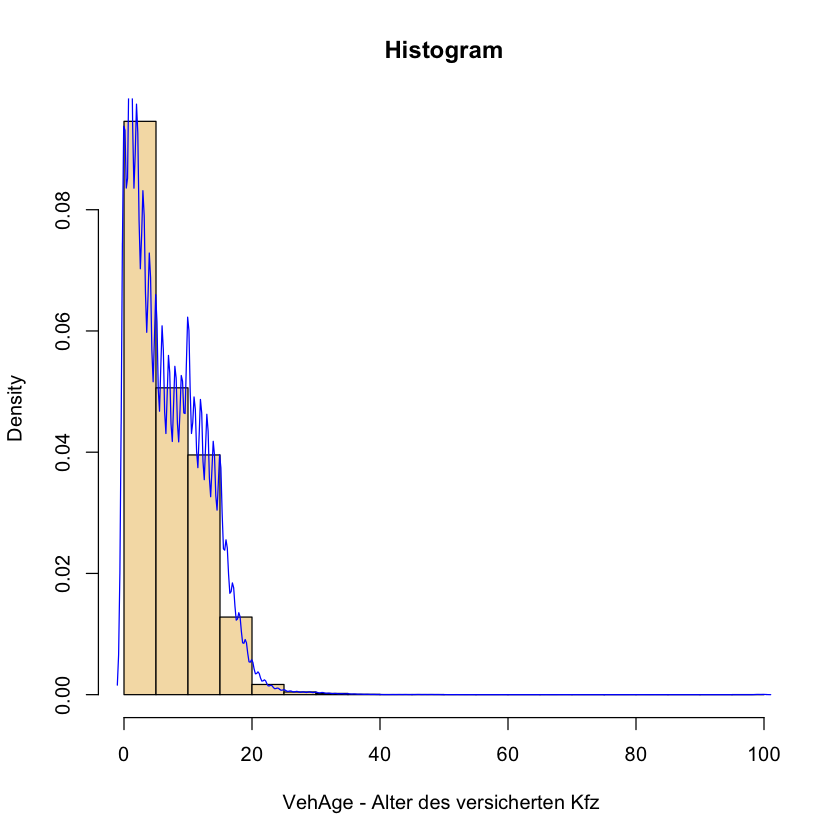

In [45]:
hist(m1$VehAge, col = 'wheat', prob = TRUE , xlab = 'VehAge - Alter des versicherten Kfz ', main = 'Histogram' )
lines(density(m1$VehAge), col = 'blue')

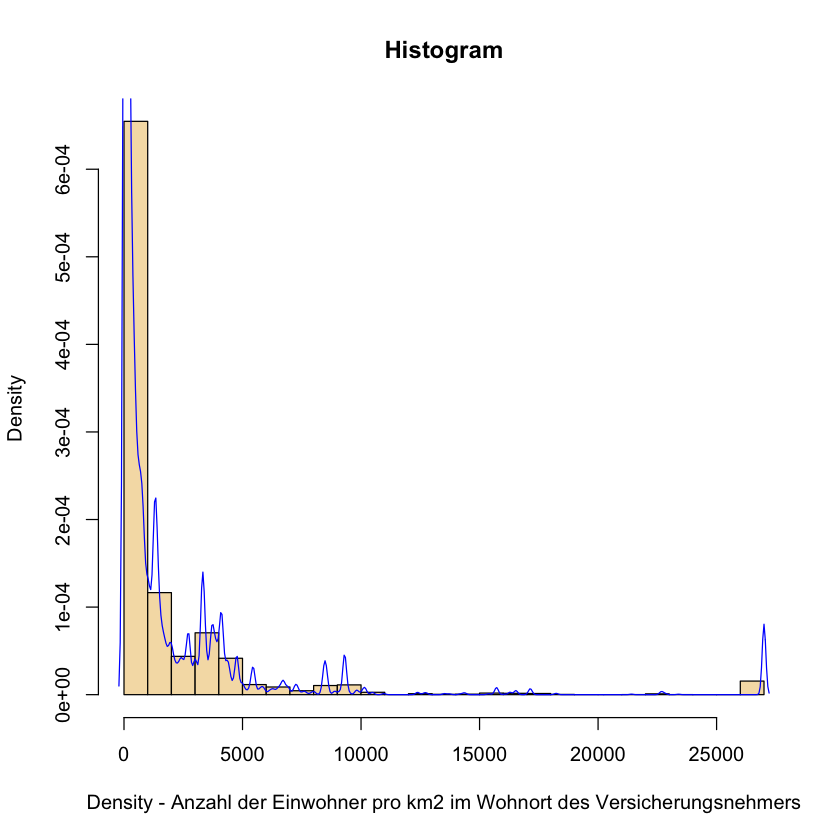

In [46]:
hist(m1$Density, col = 'wheat', prob = TRUE , xlab = 'Density - Anzahl der Einwohner pro km2 im Wohnort des Versicherungsnehmers', main = 'Histogram' )
lines(density(m1$Density), col = 'blue')

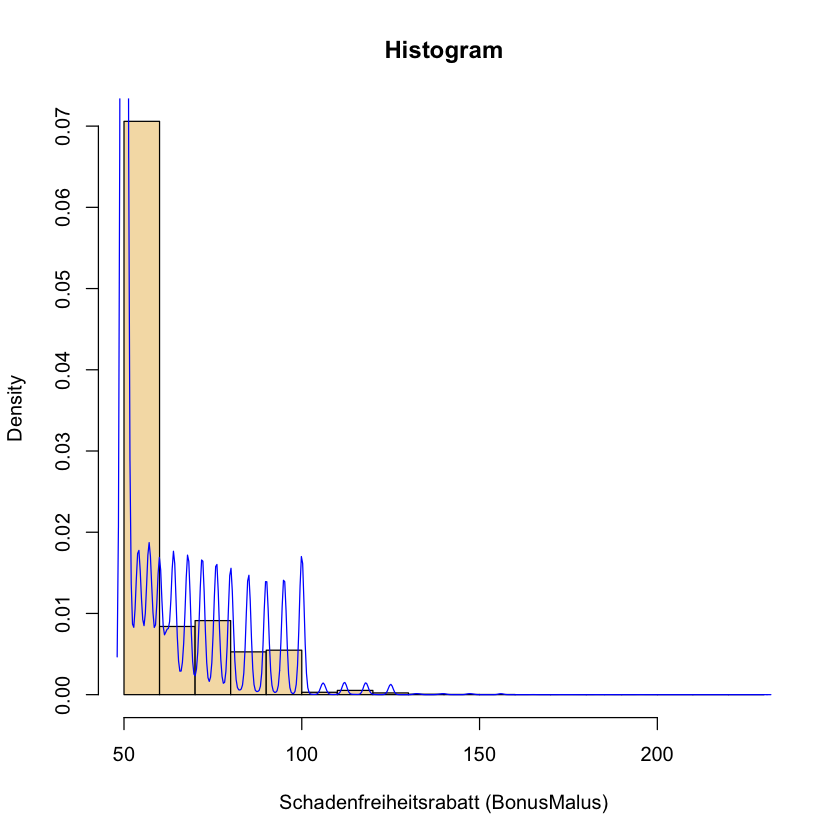

In [47]:
hist(m1$BonusMalus, col = 'wheat', prob = TRUE , xlab = 'Schadenfreiheitsrabatt (BonusMalus)', main = 'Histogram' )
lines(density(m1$BonusMalus), col = 'blue')

In [ ]:
hist(m1$VehPower, col = 'wheat', prob = TRUE , xlab = 'VehPower - Leistung des versicherten Kfz', main = 'Histogram' )
lines(density(m1$Density), col = 'blue')

We see that there are skewed to the left and do not contain much observation points on the maximum of the scala. We will categorize and cap the maximums to achieve more stability in the modelling.

## 3. Discrete Predictors

### 3.1 VehGas

Slightly higher Claim Rates for Regular vs Diesel
Probably due to size of dataset even minor differences are showing
up highly statistically significant

In [30]:
tbl <- xtabs(~ Claim + VehGas, data = m1)
print(summary(tbl))
prop_tbl <- prop.table(tbl, margin=2)
print(prop_tbl)

Call: xtabs(formula = ~Claim + VehGas, data = m1)
Number of cases in table: 678013 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 117.8, df = 1, p-value = 1.916e-27
     VehGas
Claim     Diesel    Regular
    0 0.95270311 0.94694357
    1 0.04729689 0.05305643


### 3.2 VehBrand

VehBrand B14 showing lower Claim incidence

In [39]:
tbl <- xtabs(~ Claim + VehBrand, data = m1)
print(summary(tbl))
prop_tbl <- prop.table(tbl, margin=2)
print(prop_tbl)

Call: xtabs(formula = ~Claim + VehBrand, data = m1)
Number of cases in table: 678013 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 37.05, df = 10, p-value = 5.546e-05
     VehBrand
Claim         B1        B10        B11        B12        B13        B14
    0 0.94975297 0.95386006 0.94987118 0.95027225 0.94966333 0.96046454
    1 0.05024703 0.04613994 0.05012882 0.04972775 0.05033667 0.03953546
     VehBrand
Claim         B2         B3         B4         B5         B6
    0 0.94915583 0.94997659 0.95019659 0.94489684 0.95138013
    1 0.05084417 0.05002341 0.04980341 0.05510316 0.04861987


### 3.3 Region

Regions seems even a stronger effect, with R83 and R91 way below others.

In [31]:
tbl <- xtabs(~ Claim + Region, data = m1)
print(summary(tbl))
prop_tbl <- prop.table(tbl, margin=2)
print(prop_tbl)

Call: xtabs(formula = ~Claim + Region, data = m1)
Number of cases in table: 678013 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 675.3, df = 21, p-value = 2.21e-129
     Region
Claim        R11        R21        R22        R23        R24        R25
    0 0.94679830 0.95076008 0.94733550 0.96766849 0.94515601 0.94445974
    1 0.05320170 0.04923992 0.05266450 0.03233151 0.05484399 0.05554026
     Region
Claim        R26        R31        R41        R42        R43        R52
    0 0.95348837 0.95997801 0.95465743 0.94363636 0.95927602 0.95073676
    1 0.04651163 0.04002199 0.04534257 0.05636364 0.04072398 0.04926324
     Region
Claim        R53        R54        R72        R73        R74        R82
    0 0.93886805 0.95169589 0.95965399 0.96219590 0.94701117 0.94383613
    1 0.06113195 0.04830411 0.04034601 0.03780410 0.05298883 0.05616387
     Region
Claim        R83        R91        R93        R94
    0 0.96576508 0.96120654 0.95429616 0.95128432
    1 0.0342349

### 3.4 Area

Simular results, Area seems also to have an influence (A, B, C with lower Claim incidence)


In [34]:
tbl <- xtabs(~ Claim + Area, data = m1)
print(summary(tbl))
prop_tbl <- prop.table(tbl, margin=2)
print(prop_tbl)

Call: xtabs(formula = ~Claim + Area, data = m1)
Number of cases in table: 678013 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 109.84, df = 5, p-value = 4.43e-22
     Area
Claim          A          B          C          D          E          F
    0 0.95352886 0.95189441 0.95124036 0.94794058 0.94680936 0.94123872
    1 0.04647114 0.04810559 0.04875964 0.05205942 0.05319064 0.05876128


### 3.5 Area x Region
These are measuring similar things, so maybe they correlate?

Not only they correlated there seems to be a weird pattern on area F, showing up
only on Region R11

In [35]:
tbl <- xtabs(~ Region + Area, data = m1)
print(summary(tbl))
prop_tbl <- prop.table(tbl, margin=2)
print(prop_tbl)

Call: xtabs(formula = ~Region + Area, data = m1)
Number of cases in table: 678013 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 345999, df = 105, p-value = 0
      Area
Region            A            B            C            D            E
   R11 0.0115143761 0.0250599663 0.0339118199 0.0808266709 0.2186313034
   R21 0.0095327876 0.0058972422 0.0030956848 0.0036214676 0.0032588013
   R22 0.0107352078 0.0206337216 0.0093287471 0.0114053141 0.0131372706
   R23 0.0093404004 0.0155713699 0.0118459454 0.0081928283 0.0227678669
   R24 0.5318737555 0.3401052227 0.2402334793 0.1594303280 0.0683837949
   R25 0.0191425301 0.0241323103 0.0173181155 0.0133644687 0.0126342342
   R26 0.0326673528 0.0176122133 0.0186210131 0.0050792897 0.0103815058
   R31 0.0059736237 0.0187519050 0.0342870544 0.0766906779 0.0513534597
   R41 0.0076377733 0.0113174042 0.0198144674 0.0445592232 0.0057229509
   R42 0.0002020066 0.0024516625 0.0033823223 0.0031663105 0.0063061815
   R43 0.003453

## 4. Response Variables

We want to check the distribution of the Response variables, to decide
on modelling strategies for later



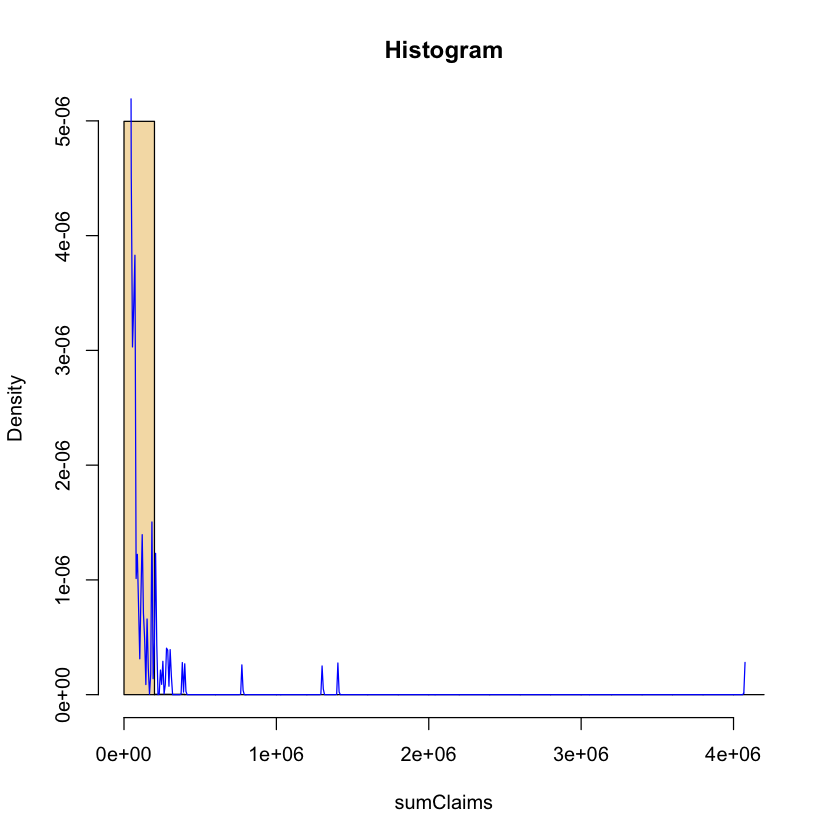

In [20]:
hist(m1$sumClaims, col = 'wheat', prob = TRUE , xlab = 'sumClaims', main = 'Histogram' )
lines(density(m1$sumClaims, na.rm = TRUE ), col = 'blue')

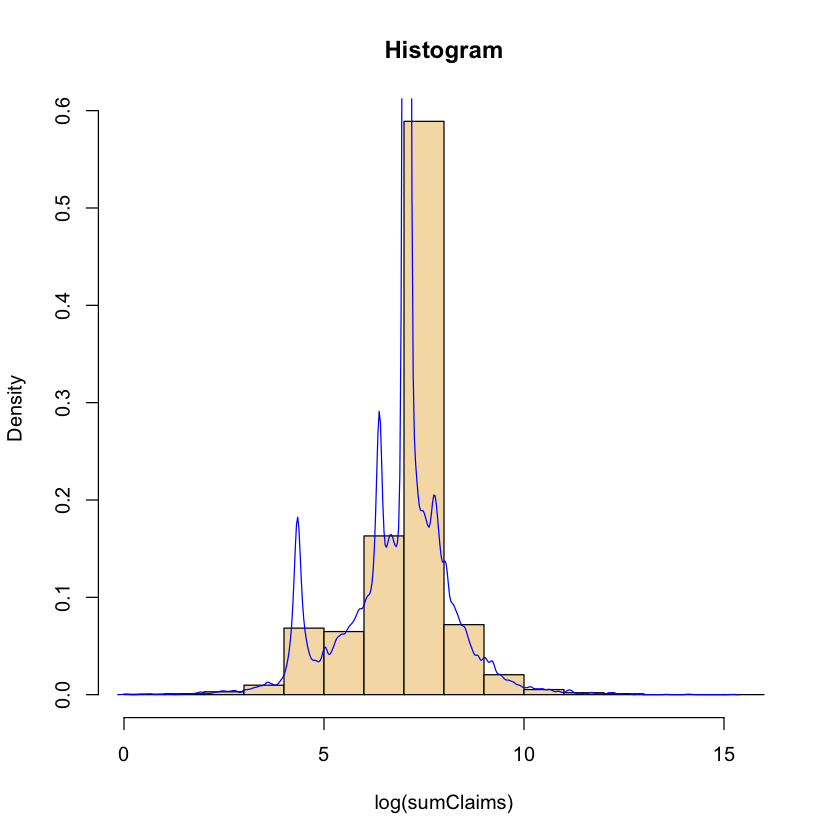

In [22]:
hist(log(m1$sumClaims), col = 'wheat', prob = TRUE , xlab = 'log(sumClaims)', main = 'Histogram' )
lines(density(log(m1$sumClaims), na.rm = TRUE ), col = 'blue')

pdf 
  2

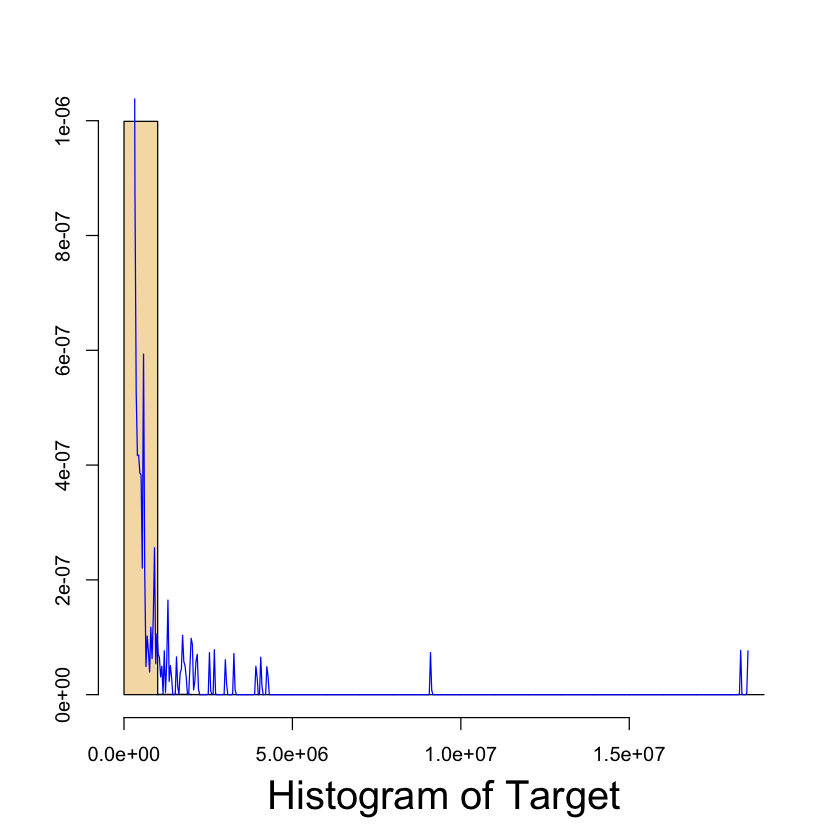

In [92]:
hist(cm1$target, col = 'wheat', prob = TRUE , xlab = 'Histogram of Target', main = '', ylab = '', cex.lab = 2 )
lines(density(cm1$target, na.rm = TRUE ), col = 'blue')


svg(filename = "graf1.svg", width = 6, height = 6)
hist(cm1$target, col = 'wheat', prob = TRUE , xlab = 'Histogram of Target', main = '', ylab = '', cex.lab = 2 )
lines(density(cm1$target, na.rm = TRUE ), col = 'blue')
dev.off()



pdf 
  2

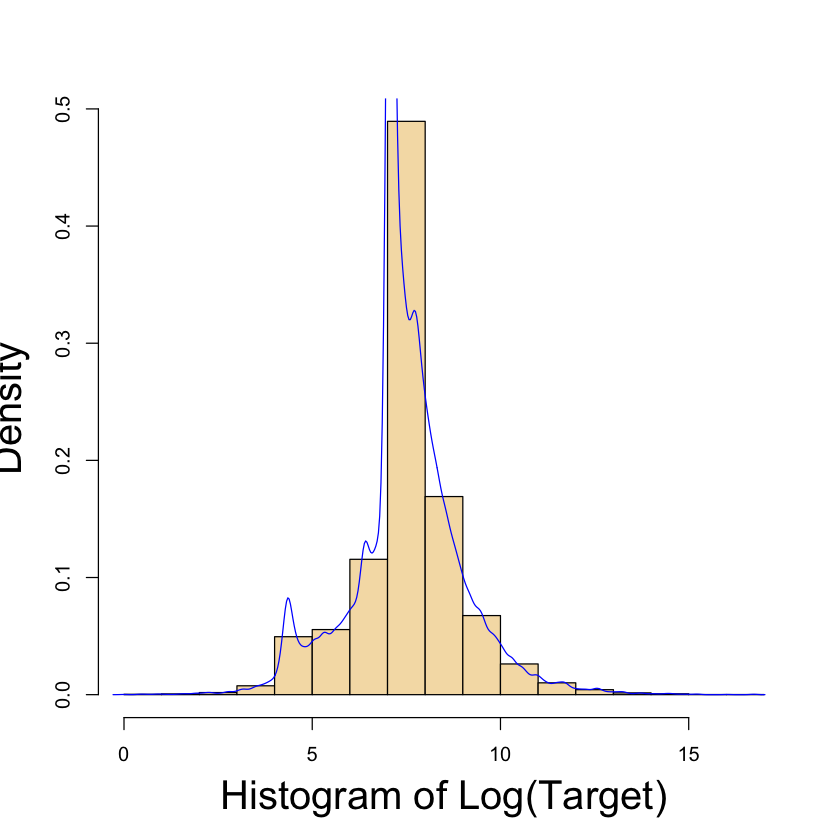

In [95]:
hist(log(cm1$target), col = 'wheat', prob = TRUE , xlab = 'Histogram of Log(Target)', main = '' , cex.lab = 2)
lines(density(log(cm1$target), na.rm = TRUE ), col = 'blue')

svg(filename = "graf2.svg", width = 6, height = 6)
hist(log(cm1$target), col = 'wheat', prob = TRUE , xlab = 'Histogram of Log(Target)', main = '' , ylab = '' , cex.lab = 2)
lines(density(log(cm1$target), na.rm = TRUE ), col = 'blue')

dev.off()


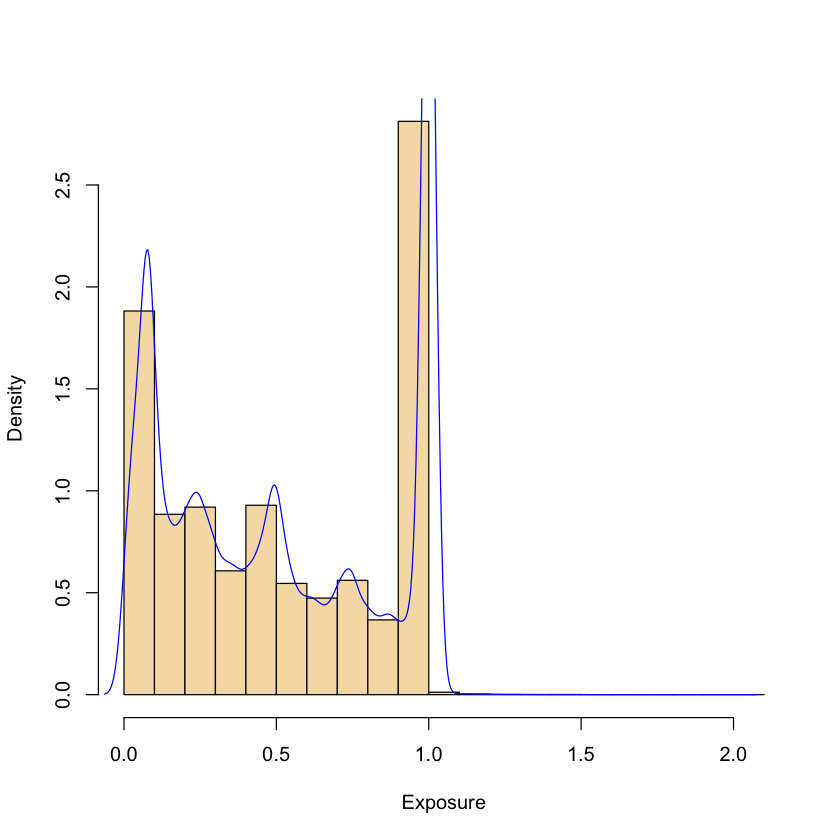

In [68]:
hist(m1$Exposure, col = 'wheat', prob = TRUE , xlab = 'Exposure', main= '' )
lines(density(m1$Exposure, na.rm = TRUE ), col = 'blue')

We can see how highly assymetric the claims distrubution is.  We will have to model it approppiertly.

## 5. Associations with Response Variable

For this we will need to run the rest of the FE/DataTransformation Pipeline

In [8]:
source('../trunk/progs/002-FeatEng_Prep.R')

## ClaimSum/Exposure vs Driver Age

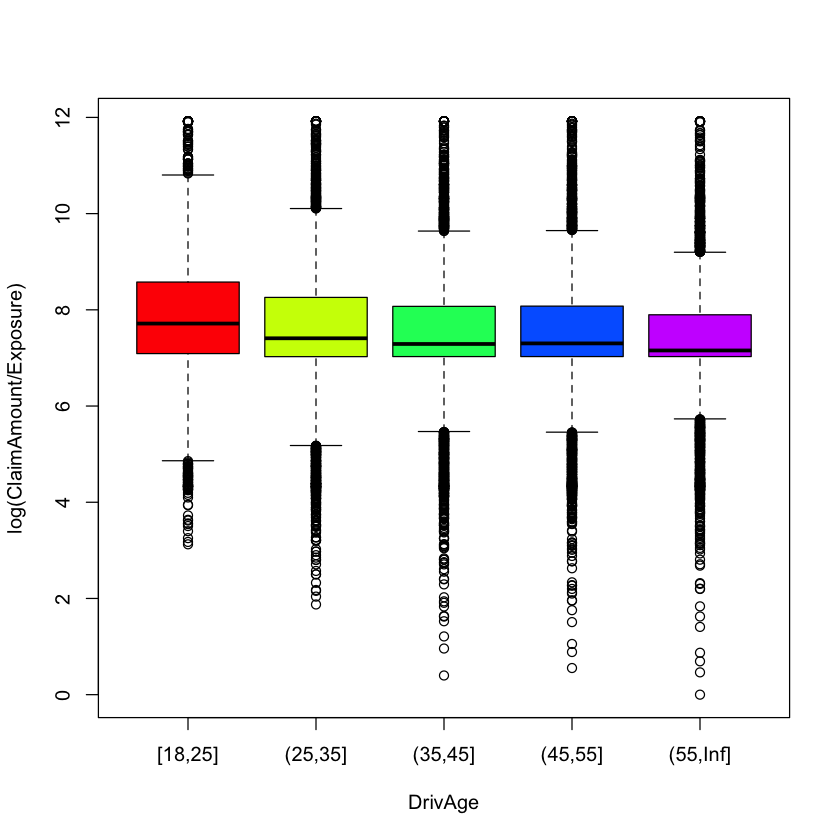

In [9]:
boxplot(log(target) ~ DrivAge, data = m2, col = rainbow(5), ylab = 'log(ClaimAmount/Exposure)')

In [60]:
svg(filename = "my_plot.svg", width = 6, height = 6)
boxplot(log(target) ~ DrivAge, data = m2, col = rainbow(5), ylab = 'log(ClaimAmount/Exposure)')
dev.off()

pdf 
  2

In [21]:
## ClaimSum/Exposure vs Vehicle Age

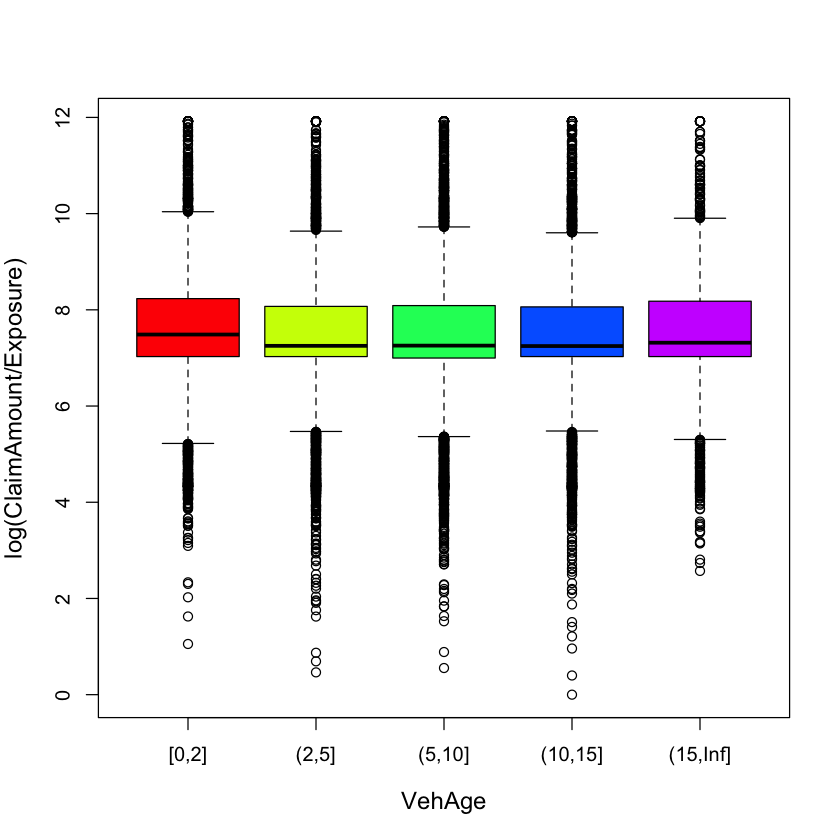

In [20]:
boxplot(log(target) ~ VehAge, data = m2, col = rainbow(5), ylab = 'log(ClaimAmount/Exposure)'  ,cex.lab = 1.2)

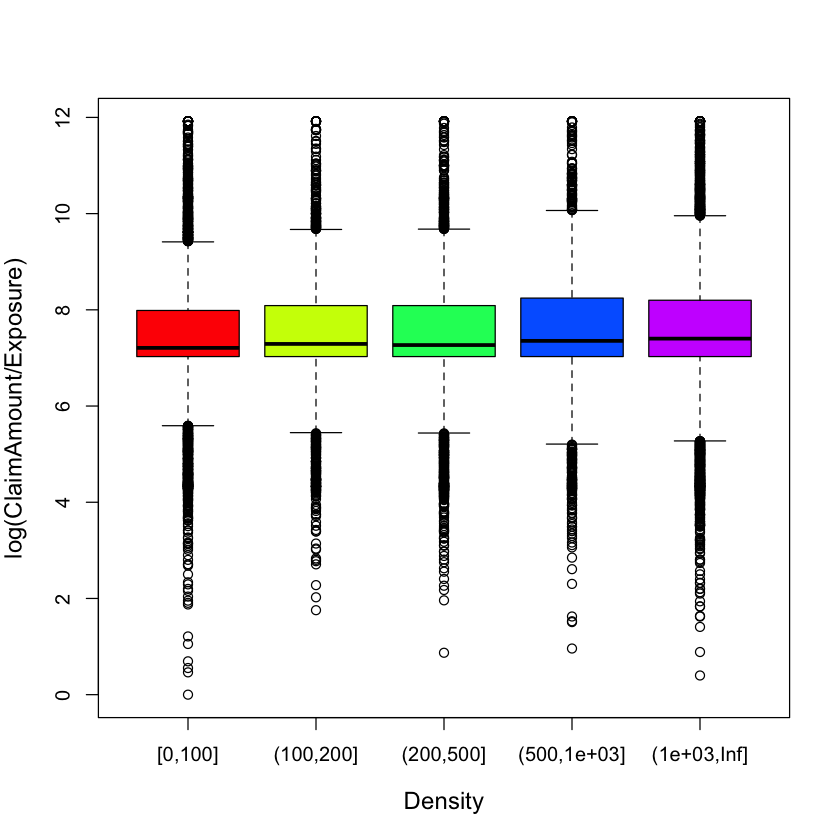

In [22]:
boxplot(log(target) ~ Density, data = m2, col = rainbow(5), ylab = 'log(ClaimAmount/Exposure)'  ,cex.lab = 1.2)

## ClaimSum/Exposure vs Bonus Malus

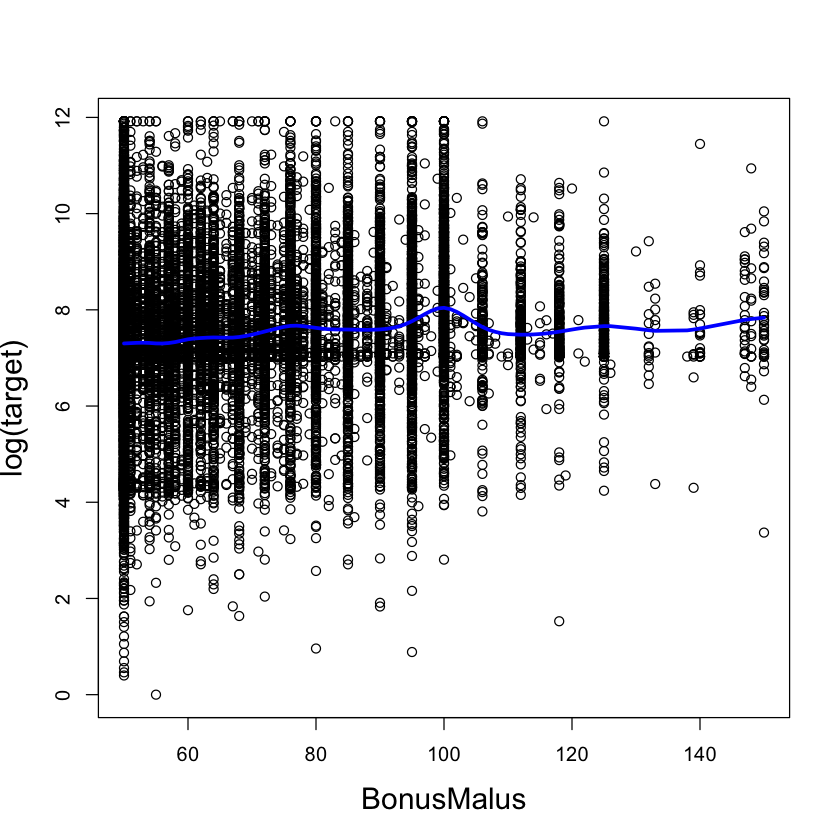

In [10]:
plot(log(target) ~ BonusMalus, data = cm2, cex.lab = 1.5)
spl1 <- smooth.spline(cm2$BonusMalus, log(cm2$target))
lines(spl1, col = 'blue', lwd = 3)

## ClaimSum/Exposure vs Region

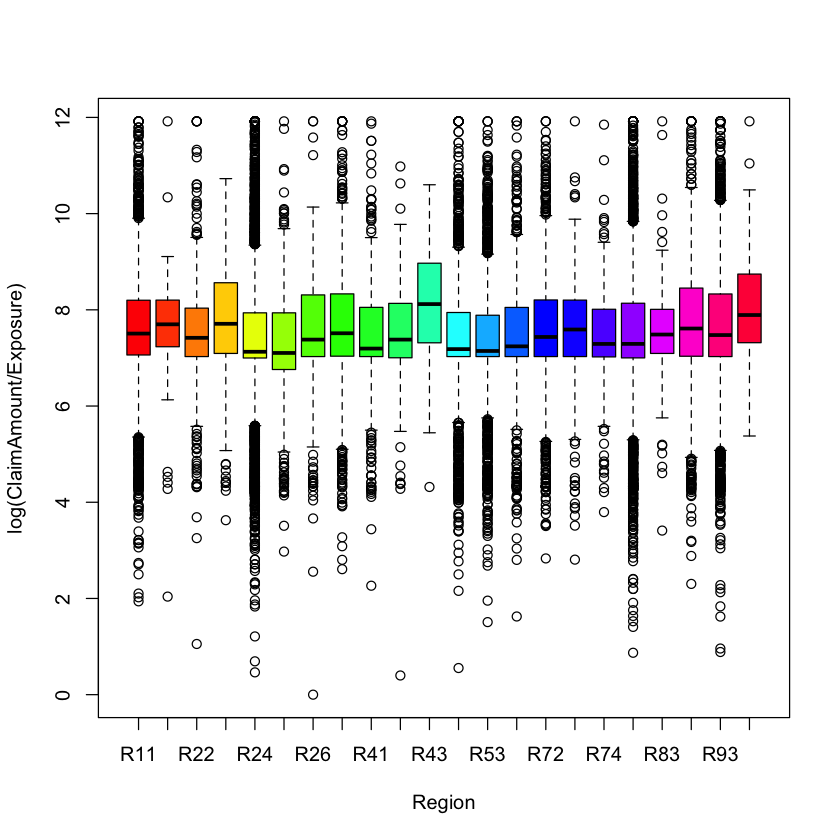

In [12]:
boxplot(log(target) ~ Region, data = m2, col = rainbow(22), ylab = 'log(ClaimAmount/Exposure)')

In [14]:
## ClaimSum/Exposure vs Area

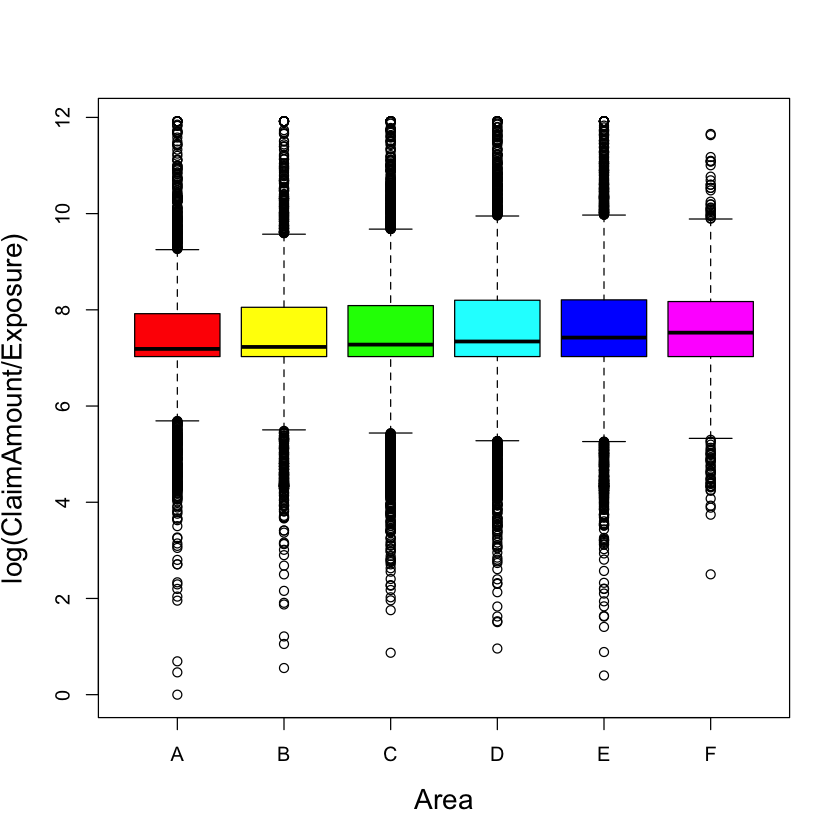

In [18]:
boxplot(log(target) ~ Area, data = m2, col = rainbow(6), ylab = 'log(ClaimAmount/Exposure)', cex.lab = 1.4)

## Area vs Claim

In [2]:
tbl <- xtabs(~ Claim + Area, data = m1)
print(summary(tbl))
prop_tbl <- prop.table(tbl, margin=2)
print(prop_tbl)

Call: xtabs(formula = ~Claim + Area, data = m1)
Number of cases in table: 678013 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 109.84, df = 5, p-value = 4.43e-22
     Area
Claim          A          B          C          D          E          F
    0 0.95352886 0.95189441 0.95124036 0.94794058 0.94680936 0.94123872
    1 0.04647114 0.04810559 0.04875964 0.05205942 0.05319064 0.05876128


## Region vs Claim

In [4]:
tbl <- xtabs(~ Claim + Region, data = m1)
print(summary(tbl))
prop_tbl <- prop.table(tbl, margin=2)
print(prop_tbl)

Call: xtabs(formula = ~Claim + Region, data = m1)
Number of cases in table: 678013 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 675.3, df = 21, p-value = 2.21e-129
     Region
Claim        R11        R21        R22        R23        R24        R25
    0 0.94679830 0.95076008 0.94733550 0.96766849 0.94515601 0.94445974
    1 0.05320170 0.04923992 0.05266450 0.03233151 0.05484399 0.05554026
     Region
Claim        R26        R31        R41        R42        R43        R52
    0 0.95348837 0.95997801 0.95465743 0.94363636 0.95927602 0.95073676
    1 0.04651163 0.04002199 0.04534257 0.05636364 0.04072398 0.04926324
     Region
Claim        R53        R54        R72        R73        R74        R82
    0 0.93886805 0.95169589 0.95965399 0.96219590 0.94701117 0.94383613
    1 0.06113195 0.04830411 0.04034601 0.03780410 0.05298883 0.05616387
     Region
Claim        R83        R91        R93        R94
    0 0.96576508 0.96120654 0.95429616 0.95128432
    1 0.0342349